## First step: read data

In [1]:
import numpy as np
import cv2

In [2]:
# Load n frames from a video
def get_content(file, length = 3):
    cap = cv2.VideoCapture(file)
    all_frames = []
    for _ in range(length):
        if cap.isOpened():
            ret, frame = cap.read()
            all_frames.append(frame)

    cap.release()
    return all_frames

Test: load a video and plot the first frame

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Note: used convert to down scale the video to save memory
test_frames_small = get_content('1,2,3,4_G=0nM,R=100nM,Y=100nM_0min_small.avi')

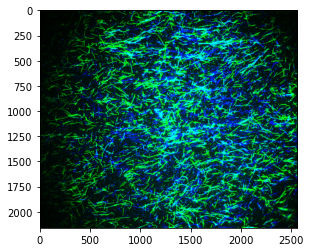

In [5]:
plt.imshow(test_frames_small[0])

Prepare data with pandas

In [6]:
from glob import glob
from parse import parse
import pandas as pd

In [7]:
def prepare_csv(file_list):
    data = []
    for name in file_list:
        vals = name.split('_')
        #vals 0 is the type of microtubules
        m_types = [int(a) for a in vals[0].split(',')]
        #vals 1 is the types of linkers and concentrations
        l_types = {}
        for a in vals[1].split(','):
            b = parse("{}={:g}nM",a)
            l_types[b.fixed[0]] = b.fixed[1] # removing the unit
        #vals 2 in the timing
        timing = parse("{:d}min",vals[2]).fixed[0]
        data.append([name,m_types,l_types,timing])
    return pd.DataFrame(data, columns=['video_name','m_types','l_types','timing'])

In [8]:
# Read all video ending in "_small.avi"
all_frames_small = [get_content(file,length=19) for file in glob("*_small.avi")]
dat = prepare_csv(glob("*_small.avi"))
dat['tag'] = [2*int(a['G'] > 50.0) + int(a['Y'] > 50.0) -1 for a in dat['l_types']]
dat

,video_name,m_types,l_types,timing,tag
0,"1,2,3,4_G=100nM,R=100nM,Y=0nM_60min_small.avi","[1, 2, 3, 4]","{'G': 100.0, 'R': 100.0, 'Y': 0.0}",60,1
1,"1,2,3,4_G=100nM,R=0nM,Y=100nM_30min_2_small.avi","[1, 2, 3, 4]","{'G': 100.0, 'R': 0.0, 'Y': 100.0}",30,2
2,"1,2,3,4_G=100nM,R=100nM,Y=0nM_60min_2_small.avi","[1, 2, 3, 4]","{'G': 100.0, 'R': 100.0, 'Y': 0.0}",60,1
3,"1,2,3,4_G=0nM,R=100nM,Y=100nM_10min_2_small.avi","[1, 2, 3, 4]","{'G': 0.0, 'R': 100.0, 'Y': 100.0}",10,0
4,"1,2,3,4_G=0nM,R=100nM,Y=100nM_60min_2_small.avi","[1, 2, 3, 4]","{'G': 0.0, 'R': 100.0, 'Y': 100.0}",60,0
5,"1,2,3,4_G=100nM,R=100nM,Y=0nM_10min_2_small.avi","[1, 2, 3, 4]","{'G': 100.0, 'R': 100.0, 'Y': 0.0}",10,1
6,"1,2,3,4_G=100nM,R=0nM,Y=100nM_40min_2_small.avi","[1, 2, 3, 4]","{'G': 100.0, 'R': 0.0, 'Y': 100.0}",40,2
7,"1,2,3,4_G=0nM,R=100nM,Y=100nM_60min_small.avi","[1, 2, 3, 4]","{'G': 0.0, 'R': 100.0, 'Y': 100.0}",60,0
8,"1,2,3,4_G=100nM,R=0nM,Y=100nM_50min_2_small.avi","[1, 2, 3, 4]","{'G': 100.0, 'R': 0.0, 'Y': 100.0}",50,2
9,"1,2,3,4_G=100nM,R=0nM,Y=100nM_60min_small.avi","[1, 2, 3, 4]","{'G': 100.0, 'R': 0.0, 'Y': 100.0}",60,2


Compute the overlap

In [9]:
# Simplified version: we count how many times a pixel is above both thresholds.
def get_overlap(dat, th_green = 0.5, th_red = 0.5):
    index_g, index_r = [int(a*b) for a,b in zip(dat.shape,[th_green,th_red])]
    return dat[index_g:,index_r:].sum()/(dat[:,index_r:].sum()+dat[index_g:,:index_r].sum())

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [11]:
# Generate data for classification
n = 5 #windows of n+1 data -> we are using 6 frames here
th = 0.4
y = np.array([(len(all_frames_small[i])-n)*[dat['tag'][i]] for i in range(len(all_frames_small))]).ravel()
X = np.array([[[get_overlap(all_frames_small[i][j+k], th_green = th, th_red = th ) for k in range(n+1)] for j in range(len(all_frames_small[i])-n)] for i in range(len(all_frames_small))]).reshape((len(y),n+1))

In [12]:
# As an example, let's train once and evaluate the performance
clf = RandomForestClassifier(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Score: ",score)
print(y_test)
print(clf.predict(X_test))

Score:  0.8
[0 1 1 0 2 2 2 0 1 1 1 2 1 0 0 1 1 2 2 1 2 1 0 1 1 1 1 1 2 1 0 0 1 0 1 0 0
 2 0 1 1 1 2 1 1 1 2 1 2 2 1 1 1 1 2 0 1 1 0 1 1 2 1 1 2 1 1 2 0 0 0 2 1 0
 2 2 2 2 1 2 1 0 0 0 0 2 2 0 2 1 0 1 0 1 2 0 2 1 2 2 0 1 2 1 2 0 0 1 2 2 2
 0 2 1 0 0 0 0 1 2 0 0 0 2 1 2 0 0 1 1 2 0 0 1 0 1 2 0 2 1 0 0 2 0 2 2 1 0
 2 0 1 2 2 1 0 2 1 2 2 0 0 2 2 1 2 2 1 1 2 2 1 0 1 0 0 0 2 0 1 1 1 1 1 0 1]
[0 1 1 0 2 2 2 0 1 1 1 2 1 0 0 1 1 2 2 2 2 1 0 1 1 1 1 1 1 1 0 0 1 0 2 0 1
 2 1 1 1 0 2 1 1 1 1 1 2 2 1 1 0 1 2 0 2 1 0 1 1 2 1 1 1 1 1 2 1 1 0 2 0 0
 1 2 2 1 1 2 1 0 0 0 0 2 0 1 2 1 1 1 0 1 2 0 2 1 1 1 0 1 2 1 2 0 0 1 2 2 2
 0 2 0 0 0 0 1 1 2 1 0 0 2 2 1 0 0 1 2 0 0 0 0 0 1 2 0 1 1 1 2 2 0 2 2 1 0
 2 0 1 0 1 1 0 2 2 2 2 0 2 2 2 0 1 2 1 1 2 2 1 0 1 0 0 0 2 0 1 1 1 1 1 0 1]


In [13]:
#Next, make actual stats
scores = []
for _ in range(100):
    clf = RandomForestClassifier(n_estimators=100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
scores = np.array(scores)

In [14]:
print(f"Score: {np.average(scores)}+/-{np.std(scores)}")

Score: 0.7654594594594595+/-0.029357821197242027


In [15]:
#Now with variable parameters
def generate_scores(video_data,dat,n=5,th = 0.4, repeats = 100):
    y = np.array([(len(video_data[i])-n)*[dat['tag'][i]] for i in range(len(video_data))]).ravel()
    X = np.array([[[get_overlap(video_data[i][j+k], th_green = th, th_red = th ) 
                    for k in range(n+1)] for j in range(len(video_data[i])-n)] 
                        for i in range(len(video_data))]).reshape((len(y),n+1))
    scores = []
    for _ in range(repeats):
        clf = RandomForestClassifier(n_estimators=100)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
        clf.fit(X_train, y_train)
        scores.append(clf.score(X_test, y_test))
    scores = np.array(scores)
    return scores

In [16]:
for i in range(5,10):
    scores = generate_scores(all_frames_small,dat,n=i)
    print(f"Score for n = {i}: {np.average(scores)}+/-{np.std(scores)}")

Score for n = 5: 0.7624324324324323+/-0.027171236886674666
Score for n = 6: 0.7802906976744187+/-0.029762615433581583
Score for n = 7: 0.7993081761006289+/-0.02966120685276214
Score for n = 8: 0.8062328767123289+/-0.029560091748963974
Score for n = 9: 0.8252272727272727+/-0.03485268420021042
